In [1]:
import requests
import os
import pandas as pd
from bs4 import BeautifulSoup
from env import github_token, github_username
import acquire as aqr
import prepare as prep
import explore as exp
import visual as vis

import json
import nltk

import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jongarcia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Specify the file name where you want to save the list
file_name = "repo_processed.json"

# Load the REPOS list from the JSON file
with open(file_name, 'r') as file:
    repo_loaded = json.load(file)

In [3]:
repos_df = pd.DataFrame(repo_loaded)
repos_df

,repo,language,readme_contents
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth..."
1,kiloreux/awesome-robotics,None,Awesome Robotics\n================\n\n[![Aweso...
2,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C..."
3,mithi/robotics-coursework,None,# [🐳](https://mithi.github.io/deep-blueberry) ...
4,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...
...,...,...,...
672,CatchZeng/dingtalk,Go,# dingtalk\n\n![Go](https://github.com/CatchZe...
673,1c7/Translate-Subtitle-File,None,## 字幕组机翻小助手 - [视频演示](https://www.bilibili.com/...
674,landy22granatt/Kumpulan-Script-Termux,Python,pkg update && pkg upgrade\npkg install bash\np...
675,cirosantilli/china-dictatorship,HTML,"<style>\npre{ white-space:pre }\n#header,#cont..."


In [4]:
# Define lists for additional and exclusionary words
extra_words = [
    'C++', 'Python', 'JavaScript', 'C', 'Java', 'TypeScript',
    'C#', 'Rust', 'Ruby', 'Kotlin', 'Julia', 'PHP', 'Swift',
    'Common Lisp', 'Scheme', 'Dart', 'Scala', 'Objective-C',
    'Lua', 'Prolog'
]

exclude_words = []

# List of other technologies, not languages
non_languages = [
    "CMake", "Jupyter Notebook", "HTML", "Go", "Shell", "TeX", 
    "CMake", "Dockerfile", "OpenSCAD", "MQL5", "Vue", "Smali", 
    "RobotFramework", "Cuda", "SCSS"
]

# Define the list of acceptable languages
labeled_languages = ['C++', 'Python']

# Process the DataFrame 'repos_df' by applying text preprocessing, filtering, and language categorization
repos_df = prep.process_dataframe(repos_df, extra_words, exclude_words, 'lemmatize', labeled_languages, non_languages)

# Display the first few rows of the processed DataFrame
repos_df.head()

# NOTES
# Remove any word bigger than n


,repo,language,readme
0,AtsushiSakai/PythonRobotics,Python,img srchttpsgithubcomatsushisakaipythonrobotic...
1,kiloreux/awesome-robotics,Other,awesome robotics awesomehttpscdnrawgitcomsindr...
2,NxRLab/ModernRobotics,Python,modern robotics mechanic planning control code...
3,mithi/robotics-coursework,Other,httpsmithigithubiodeepblueberry httpskoficommi...
4,onlytailei/CppRobotics,C++,cpprobotics cpp implementation pythonroboticsh...


In [5]:
# Counts and ratios of language labels in a DataFrame
counts = exp.counts_and_ratios(repos_df, "language")
counts

,n,percent
language,,
Other,268,0.395864
C++,207,0.305761
Python,202,0.298375


In [6]:
cpp_freq_df, python_freq_df, other_freq_df, all_freq_df = exp.freq_to_dataframe(repos_df)

In [7]:
cpp_freq_df

,C++,count
0,build,1223
1,robot,926
2,ro,626
3,use,625
4,install,606
...,...,...
23155,canardmakefilterforservice384,1
23156,insnodeid,1
23157,consolidating,1
23158,consolidate,1


In [8]:
# Calculate word frequencies for the top words with word column and index starting at 1
top_word_counts = exp.word_counts(repos_df)

# Display the top word frequencies
top_word_counts.head()

,word,all,C++,Python,Other
1,robot,4650,926,1090,2634
2,using,2730,598,863,1269
3,learning,2592,67,917,1608
4,ro,2167,626,196,1345
5,use,1982,625,621,736


In [9]:
# Concatenate word frequency DataFrames with word column and index starting at 1
top_freq_df = exp.counts_df_concat(repos_df)

# Display top words per language side by side
top_freq_df.head()

,,All,count,,,C++,count,,,Python,count,,,Other,count
1,,robot,4650,,,build,1223.0,,,robot,1090.0,,,robot,2634.0
2,,using,2730,,,robot,926.0,,,3d,954.0,,,learning,1608.0
3,,learning,2592,,,ro,626.0,,,learning,917.0,,,ro,1345.0
4,,ro,2167,,,use,625.0,,,python,885.0,,,using,1269.0
5,,use,1982,,,install,606.0,,,using,863.0,,,robotics,1154.0


In [10]:
# Word frequencies, keeping words as the index
# The word frequencies will be stored in the 'word_counts' variable
word_counts = exp.word_counts(repos_df, reset_index=False)

# Display the first 5 rows
word_counts.head()

# I ran word_counts again because we need to set reset_index=False before using plot_top_words plot

,all,C++,Python,Other
robot,4650,926,1090,2634
using,2730,598,863,1269
learning,2592,67,917,1608
ro,2167,626,196,1345
use,1982,625,621,736


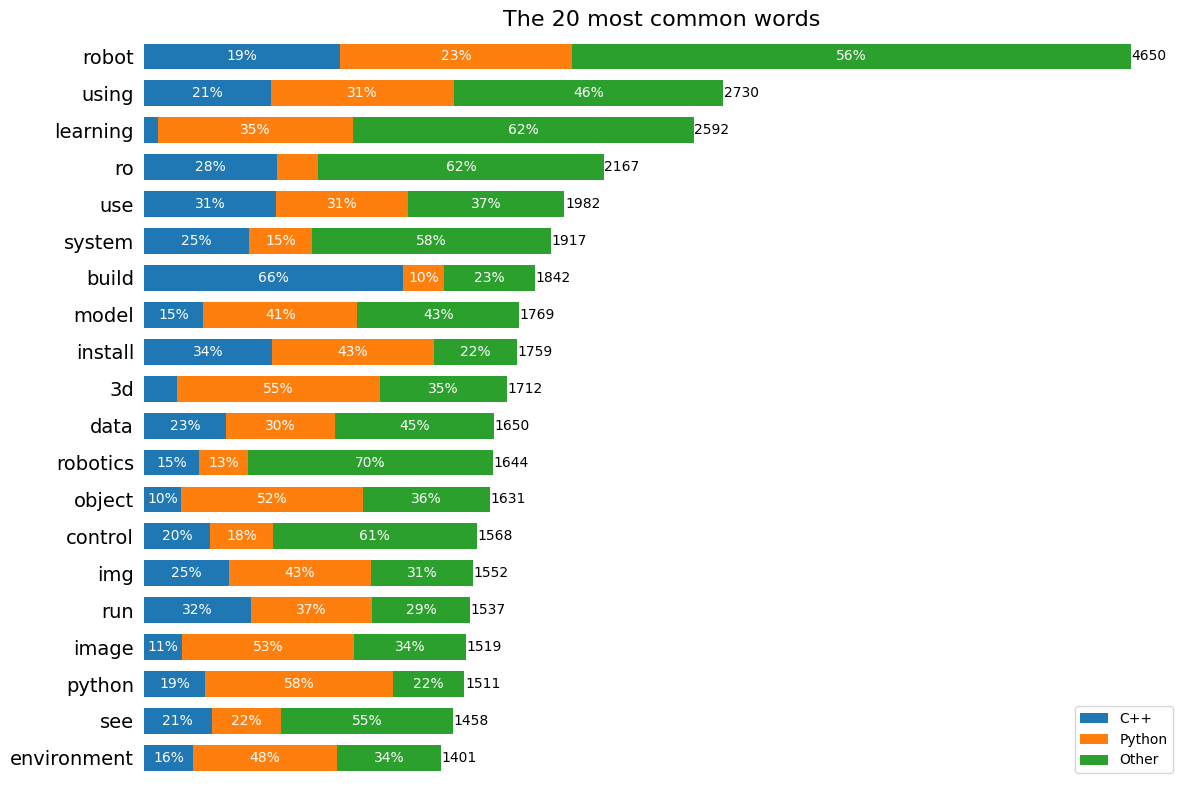

In [11]:
# Plot the top 20 words using a horizontal stacked bar chart

vis.plot_top_words(word_counts, column='all', top_n=20, figsize=(12, 8))

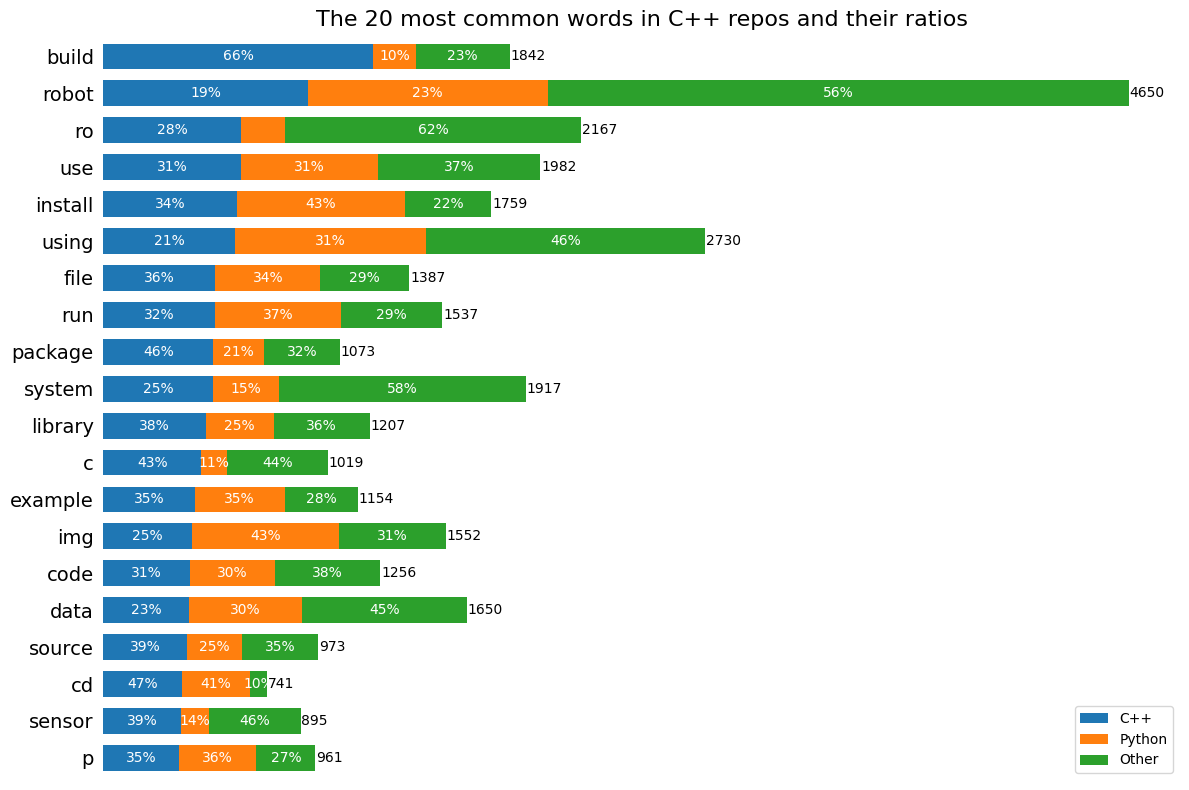

In [12]:
# Plot the top 20 words for C++ using a horizontal stacked bar chart
vis.plot_top_words(word_counts, column='C++', top_n=20, figsize=(12, 8), title= 'The 20 most common words in C++ repos and their ratios')

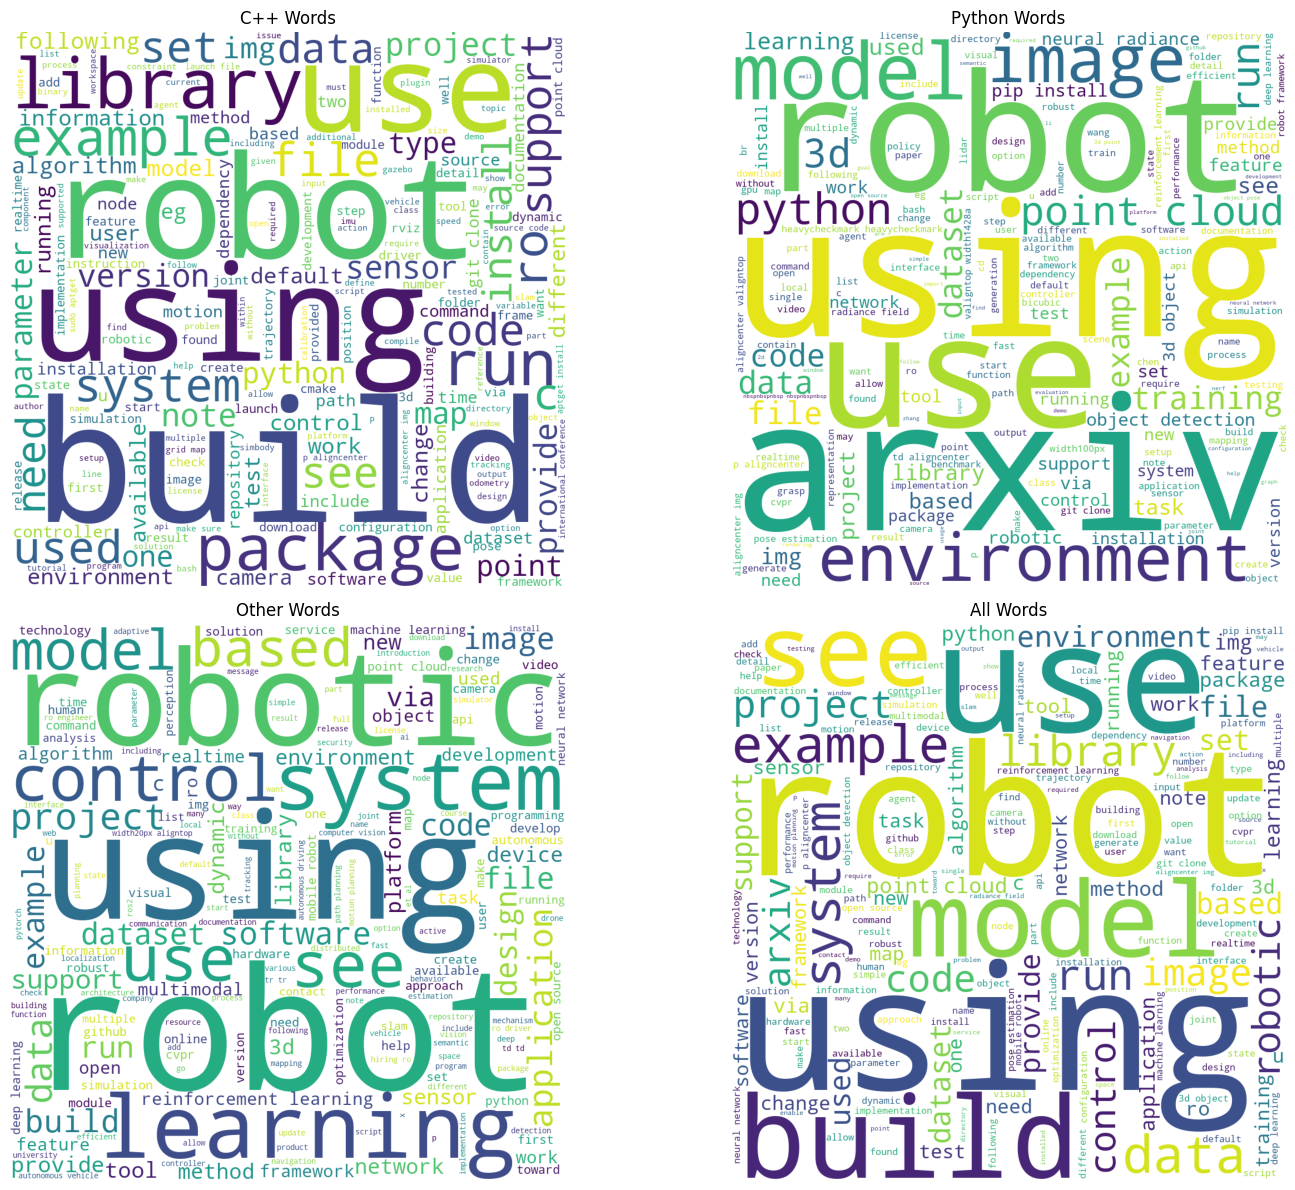

In [11]:
# Generate and display word clouds for different language sets
vis.word_clouds(repos_df)

In [12]:
cpp_text, python_text, other_text, all_text = exp.join_text(repos_df)
cpp_words, python_words, other_words, all_words = exp.list_words(repos_df)
cpp_freq, python_freq, other_freq, all_freq = exp.word_freq(repos_df)

In [13]:
type(cpp_words)

pandas.core.series.Series

## No functions have been created for the work below 

In [14]:
cpp_ratio_words = vis.calculate_ratios(repos_df, min_count_cpp=100, min_count_python=100, min_count_other=100, sort_column='p_C++')

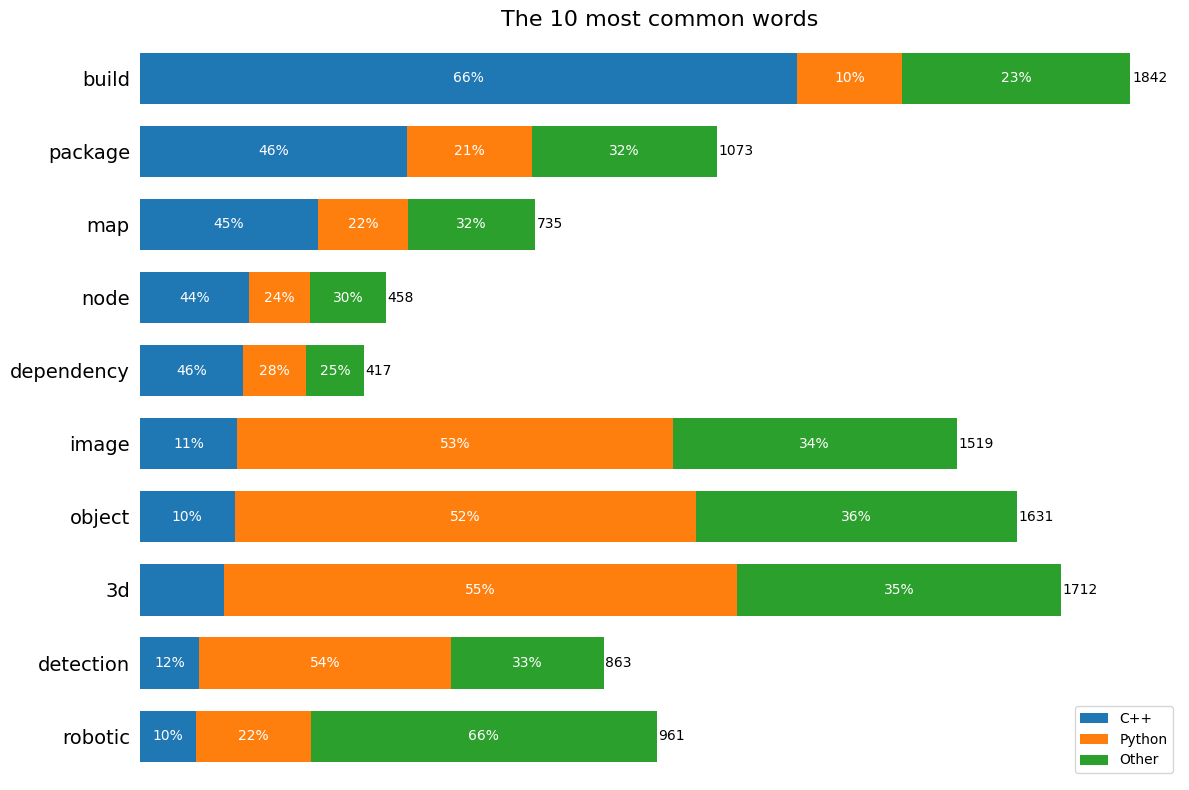

In [15]:
# Plot the top 20 words for C++ using a horizontal stacked bar chart
vis.plot_top_words(cpp_ratio_words, column='C++', top_n=10, figsize=(12, 8))

In [18]:
top_20_cpp_bigrams = exp.get_top_n_bigrams(all_words, 3, top_n= 20, remove_delimiter=True)
top_20_cpp_bigrams

(p, aligncenter, img)                                                                                                           191
(3d, object, detection)                                                                                                         160
(neural, radiance, field)                                                                                                       157
(td, aligncenter, valigntop)                                                                                                    132
(aligncenter, valigntop, width1428a)                                                                                            130
(sudo, aptget, install)                                                                                                         127
(heavycheckmark, heavycheckmark, heavycheckmark)                                                                                122
(deep, reinforcement, learning)                                             